<div align="center">

# Assignment 7

---

**Author:** Matthew Walczyk  
**Date:** 9/30/2024  
**Modified By:** Matthew Walczyk  
**Description:** This program contains my week 6 exercises using pandas and scipy.

---
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<Axes: title={'center': 'Facebook Stock Closing Price and 20-day Rolling Minimum (2018)'}, xlabel='Date'>

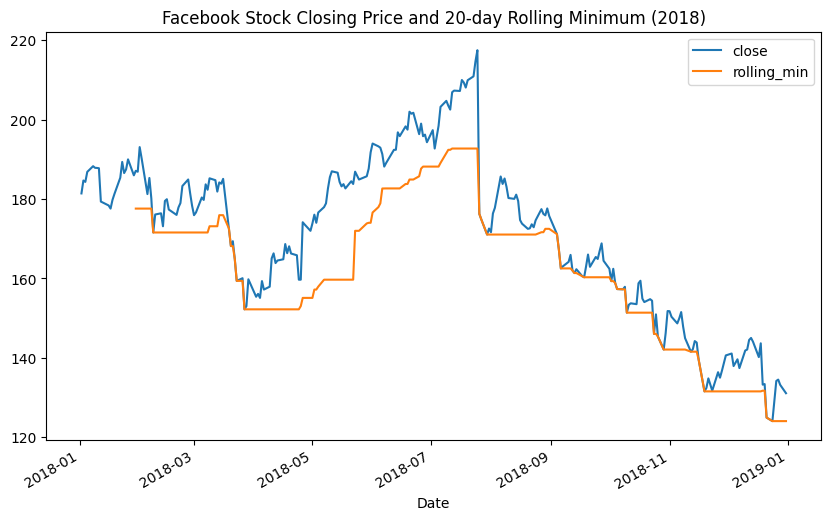

In [3]:
facebook = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_05/data/fb_stock_prices_2018.csv')

facebook['Date'] = pd.to_datetime(facebook['date'])
facebook.set_index('Date', inplace=True)

# Calculate the rolling 20-day minimum of the 'close' column
facebook['rolling_min'] = facebook['close'].rolling(window=20).min()

facebook[['close', 'rolling_min']].plot(title='Facebook Stock Closing Price and 20-day Rolling Minimum (2018)', figsize=(10, 6))

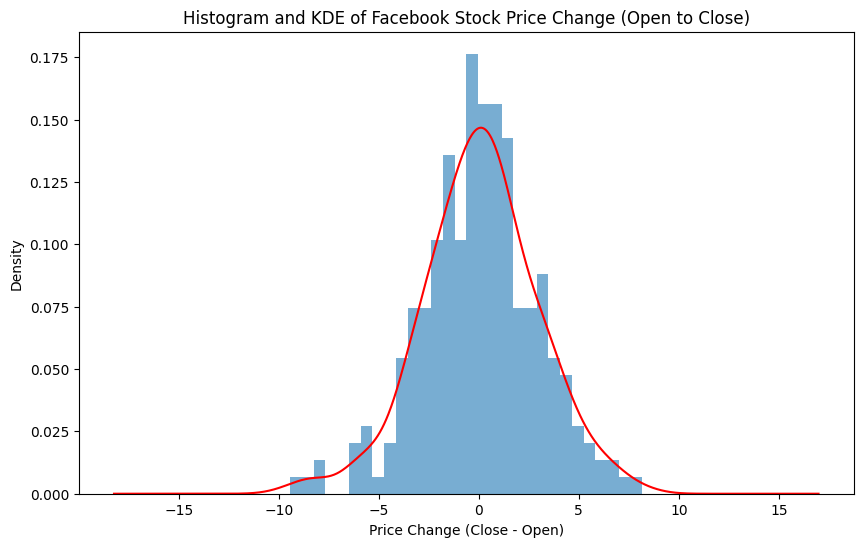

In [4]:
facebook['price_change'] = facebook['close'] - facebook['open']

ax = facebook['price_change'].plot(kind='hist', bins=30, density=True, alpha=0.6, figsize=(10, 6), title='Histogram and KDE of Facebook Stock Price Change (Open to Close)')

# Putting the KDE over the histogram
facebook['price_change'].plot(kind='kde', ax=ax, color='red')

plt.xlabel('Price Change (Close - Open)')
plt.show()

<Figure size 800x600 with 0 Axes>

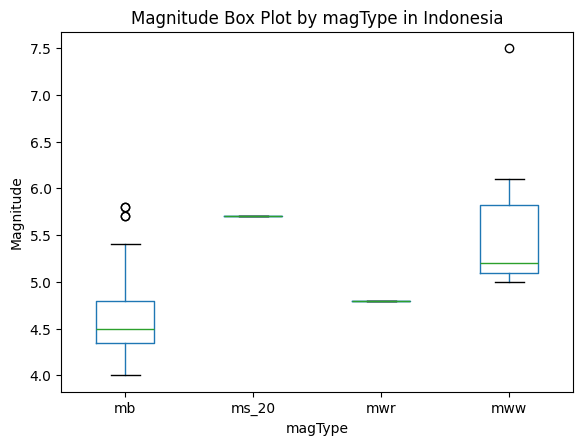

In [5]:
earthquakes = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/refs/heads/master/ch_05/data/earthquakes.csv')

df_indonesia = earthquakes[earthquakes["parsed_place"] == "Indonesia"]

# Create box plots for the magnitudes of each magType used in Indonesia
plt.figure(figsize=(8, 6))
df_indonesia.boxplot(column="mag", by="magType", grid=False)
plt.title('Magnitude Box Plot by magType in Indonesia')
plt.suptitle("")  # Remove default title
plt.xlabel('magType')
plt.ylabel('Magnitude')

# Show the plot
plt.show()


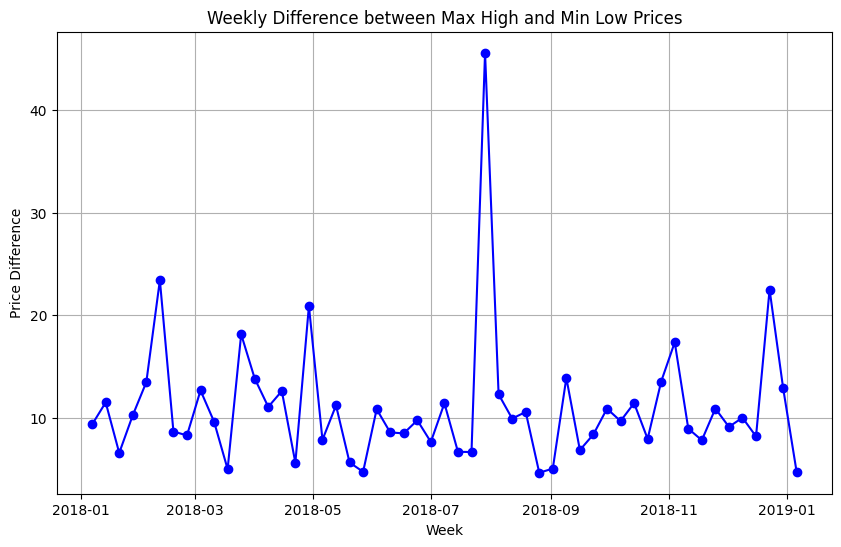

In [6]:
weekly_high_low_diff = facebook.resample('W').agg({'high': 'max', 'low': 'min'})
weekly_high_low_diff['diff'] = weekly_high_low_diff['high'] - weekly_high_low_diff['low']

plt.figure(figsize=(10, 6))
plt.plot(weekly_high_low_diff.index, weekly_high_low_diff['diff'], marker='o', linestyle='-', color='b')
plt.title('Weekly Difference between Max High and Min Low Prices')
plt.xlabel('Week')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

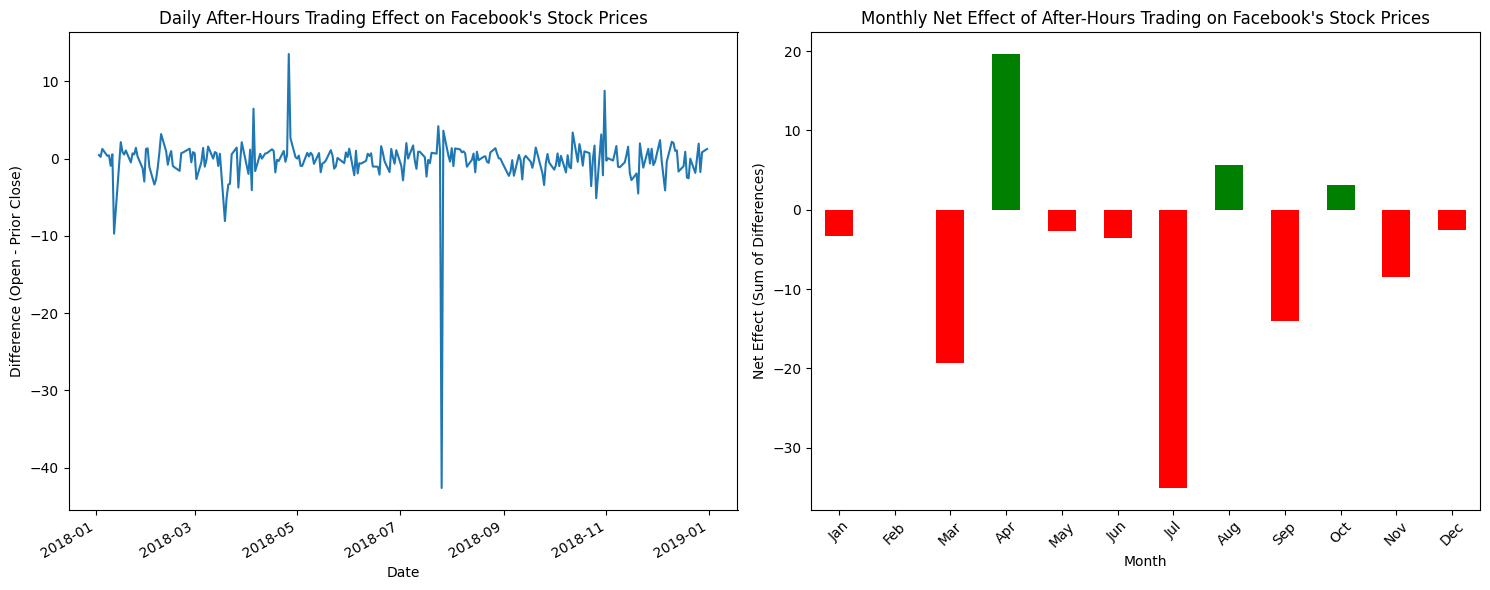

In [13]:
# Calculate the daily difference between the opening price and the prior day's closing price
facebook['prior_close'] = facebook['close'].shift(1)
facebook['after_hours_diff'] = facebook['open'] - facebook['prior_close']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Line plot for daily
facebook['after_hours_diff'].plot(ax=axes[0], title="Daily After-Hours Trading Effect on Facebook's Stock Prices")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Difference (Open - Prior Close)')

# Bar plot for monthly
monthly_effect = facebook['after_hours_diff'].resample('ME').sum()

# Create a color map for the bars
colors = ['green' if val >= 0 else 'red' for val in monthly_effect]

# Plot the bar chart with custom colors
monthly_effect.plot(kind='bar', ax=axes[1], color=colors, title="Monthly Net Effect of After-Hours Trading on Facebook's Stock Prices")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect (Sum of Differences)')

# Set the x-tick labels to the three-letter month abbreviations
axes[1].set_xticklabels([date.strftime('%b') for date in monthly_effect.index], rotation=45)

# Note Feburary has almost no difference
plt.tight_layout()
plt.show()